In [1]:
!pip install git+https://github.com/HakaiInstitute/ocean-data-parser.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/HakaiInstitute/ocean-data-parser.git to /tmp/pip-req-build-115vqbh6
  Running command git clone -q https://github.com/HakaiInstitute/ocean-data-parser.git /tmp/pip-req-build-115vqbh6
  Created wheel for ocean-data-parser: filename=ocean_data_parser-0.1.0-py3-none-any.whl size=42111 sha256=d15df3d587f429752eb3cb52029dee7ef5b5d868dc97e03dc38016af7bb2cee5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h9jxxdz/wheels/da/13/ab/3935dafef906d730e8b8408501739fcba46984c1d62b638d10
Successfully built ocean-data-parser


In [12]:
from ocean_data_parser.read import nmea
import pandas as pd

# Download test data 
NMEA test data is available here:

https://github.com/HakaiInstitute/ocean-data-parser/tree/main/tests/parsers_test_files/nmea

In [2]:
# url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
print('Download test cnv file')
url = "https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/nmea/Calvert2020_20200831T104237_046_000000.N1R"
!wget --no-cache --backups=1 {url}
print('Download test btl file')
url = "https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/nmea/nmea_with_timestamp.txt"
!wget --no-cache --backups=1 {url}

Download test cnv file
--2022-06-30 16:37:29--  https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/nmea/Calvert2020_20200831T104237_046_000000.N1R
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-06-30 16:37:30 ERROR 404: Not Found.

Download test btl file
--2022-06-30 16:37:30--  https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/main/tests/parsers_test_files/nmea/nmea_with_timestamp.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-06-30 16:37:30 ERROR 404: N

# Read NMEA file

In [36]:
df = nmea.file('../tests/parsers_test_files/nmea/nmea_with_timestamp.txt').to_dataframe()
df

,row,prefix,talker,sentence_type,subtype,manufacturer,heading,hdg_true,b_pressure_inch,inches,...,mag_variation,mag_var_dir,wind_angle,reference,wind_speed,wind_speed_units,nmea_type,gps_time,latitude_degrees_north,longitude_degrees_east
index,,,,,,,,,,,,,,,,,,,,,
0,0,20220630 180001+00:00,HC,HDT,None,None,2.3,T,None,None,...,None,None,None,None,None,None,HCHDT,NaT,NaN,NaN
1,1,20220630 180001+00:00,II,MDA,None,None,None,None,30.1,I,...,None,None,None,None,None,None,IIMDA,NaT,NaN,NaN
2,2,20220630 180001+00:00,GP,RMC,None,None,None,None,None,None,...,11.8,E,None,None,None,None,GPRMC,2022-06-30 17:59:56+00:00,49.145663,123.10683
3,3,20220630 180001+00:00,WI,MWV,None,None,None,None,None,None,...,None,None,306.79,R,7,N,WIMWV,NaT,NaN,NaN
4,4,20220630 180003+00:00,HC,HDT,None,None,2.3,T,None,None,...,None,None,None,None,None,None,HCHDT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7195,20220630 185957+00:00,WI,MWV,None,None,None,None,None,None,...,None,None,280.99,R,9.99,N,WIMWV,NaT,NaN,NaN
7196,7196,20220630 185959+00:00,HC,HDT,None,None,1.8,T,None,None,...,None,None,None,None,None,None,HCHDT,NaT,NaN,NaN
7197,7197,20220630 185959+00:00,II,MDA,None,None,None,None,30.1,I,...,None,None,None,None,None,None,IIMDA,NaT,NaN,NaN


In [39]:
# In this case the each rows prefix prior to the NMEA string is a timestamp
df['prefix_time'] = pd.to_datetime(df['prefix'])

In [57]:
# Use the prefix timestamp as an index and resample the data to a 5 min interval and keep the first good value
df_5min = df.set_index('prefix_time').resample('10s').first()
df_5min.head()

,row,prefix,talker,sentence_type,subtype,manufacturer,heading,hdg_true,b_pressure_inch,inches,...,mag_variation,mag_var_dir,wind_angle,reference,wind_speed,wind_speed_units,nmea_type,gps_time,latitude_degrees_north,longitude_degrees_east
prefix_time,,,,,,,,,,,,,,,,,,,,,
2022-06-30 18:00:00+00:00,0,20220630 180001+00:00,HC,HDT,None,None,2.3,T,30.1,I,...,11.8,E,306.79,R,7,N,HCHDT,2022-06-30 17:59:56+00:00,49.145663,123.10683
2022-06-30 18:00:10+00:00,20,20220630 180011+00:00,HC,HDT,None,None,1.9,T,30.1,I,...,11.8,E,310.69,R,7.19,N,HCHDT,2022-06-30 18:00:06+00:00,49.145663,123.10683
2022-06-30 18:00:20+00:00,40,20220630 180021+00:00,HC,HDT,None,None,1.6,T,30.1,I,...,11.8,E,303.89,R,5.99,N,HCHDT,2022-06-30 18:00:16+00:00,49.145663,123.10683
2022-06-30 18:00:30+00:00,60,20220630 180031+00:00,HC,HDT,None,None,1.8,T,30.1,I,...,11.8,E,300.89,R,4.68,N,HCHDT,2022-06-30 18:00:26+00:00,49.145663,123.10683
2022-06-30 18:00:40+00:00,80,20220630 180041+00:00,HC,HDT,None,None,1.5,T,30.1,I,...,11.8,E,316.89,R,5.89,N,HCHDT,2022-06-30 18:00:36+00:00,49.145663,123.10683


<AxesSubplot:xlabel='Time', ylabel='Air Temperature'>

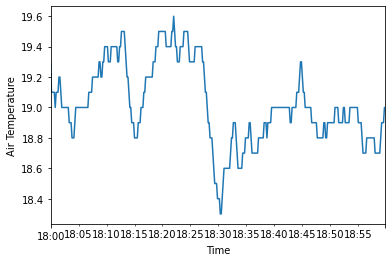

In [61]:
# Plot data
df_5min['air_temp'].astype(float).plot(xlabel='Time',ylabel='Air Temperature')